In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [25]:
df=pd.read_csv('framingham.csv')

In [26]:
df = df.drop(['education'], axis=1) 

In [27]:
df = df.drop(['currentSmoker'], axis=1) 

In [28]:
df=df.dropna()

In [29]:
top= ['sysBP','glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','male']
x=df[top]
y = df.iloc[:,-1]

In [30]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [31]:
# the numbers before SMOTE
num_before = dict(Counter(y))

#perform SMOTE

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(x, y)


#the numbers after SMOTE
num_after =dict(Counter(y_smote))

In [32]:
fram = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
fram.columns = ['sysBP','glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','male',
                    'TenYearCHD']

In [33]:
X_new = fram[top]
y_new= fram.iloc[:,-1]

In [34]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=0)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [37]:
RFC_clf=RandomForestClassifier(n_estimators=300,min_samples_split=5,max_features='auto')

In [38]:
RFC_clf.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=300)

In [39]:
RFC_predict = RFC_clf.predict(X_test)

In [40]:
#accuracy
RFC_accuracy = accuracy_score(y_test,RFC_predict)
print(f"Using RFC we get an accuracy of {round(RFC_accuracy*100,2)}%")

Using RFC we get an accuracy of 86.55%


In [41]:
print(classification_report(y_test,RFC_predict))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       656
           1       0.86      0.82      0.84       489

    accuracy                           0.87      1145
   macro avg       0.86      0.86      0.86      1145
weighted avg       0.87      0.87      0.87      1145



<AxesSubplot:>

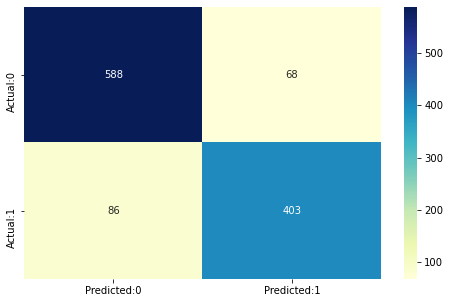

In [42]:
cm=confusion_matrix(y_test,RFC_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [43]:
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.8963414634146342
Specificity :  0.8241308793456033


In [44]:
#Cross validation
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(RFC_clf, x, y, cv=5) 

print (f"Cross-validated scores {cv_results}")
print(f"The Cross Validation accuracy is: {round(cv_results.mean() * 100,2)}%")

Cross-validated scores [0.84553928 0.852      0.852      0.844      0.84533333]
The Cross Validation accuracy is: 84.78%


In [45]:
import pickle

In [46]:
#pickling the model
pickle.dump(RFC_clf,open("fram.pkl","wb"))